## Titanic
#### As told by the data.


In [1]:
#Lets import everything we're going to need for this
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline
np.random.seed(45831)

#Read in titanic dataset
t_df = pd.read_csv('datasets/titanic.csv')

hist_bins = 50

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ced83c8>]], dtype=object)

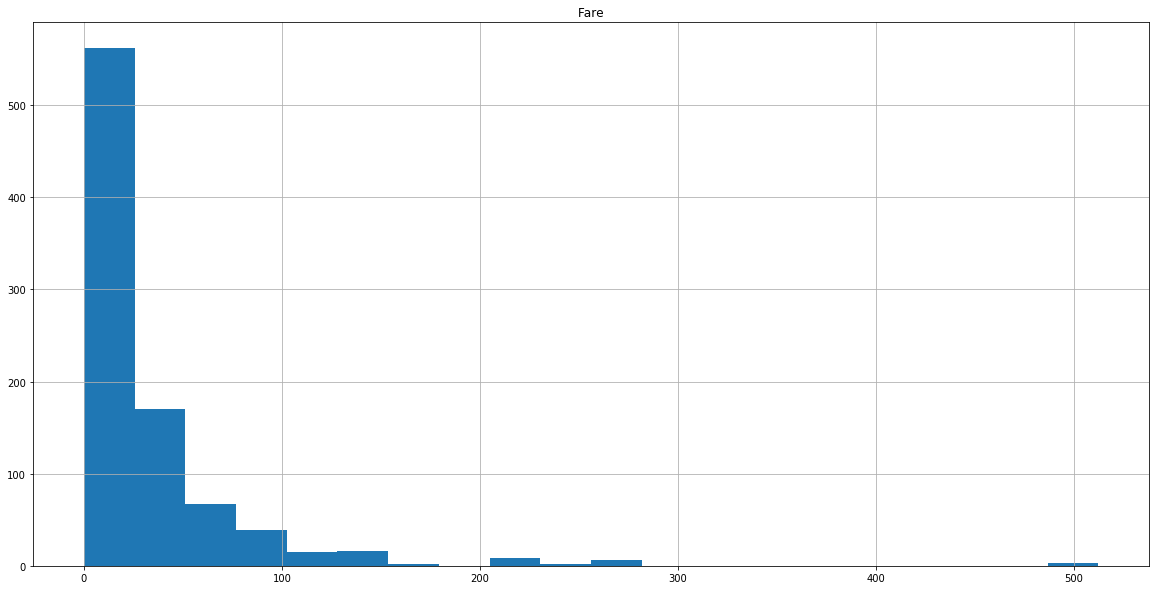

In [2]:
t_df.hist(column="Fare", bins=20,figsize=(20,10))

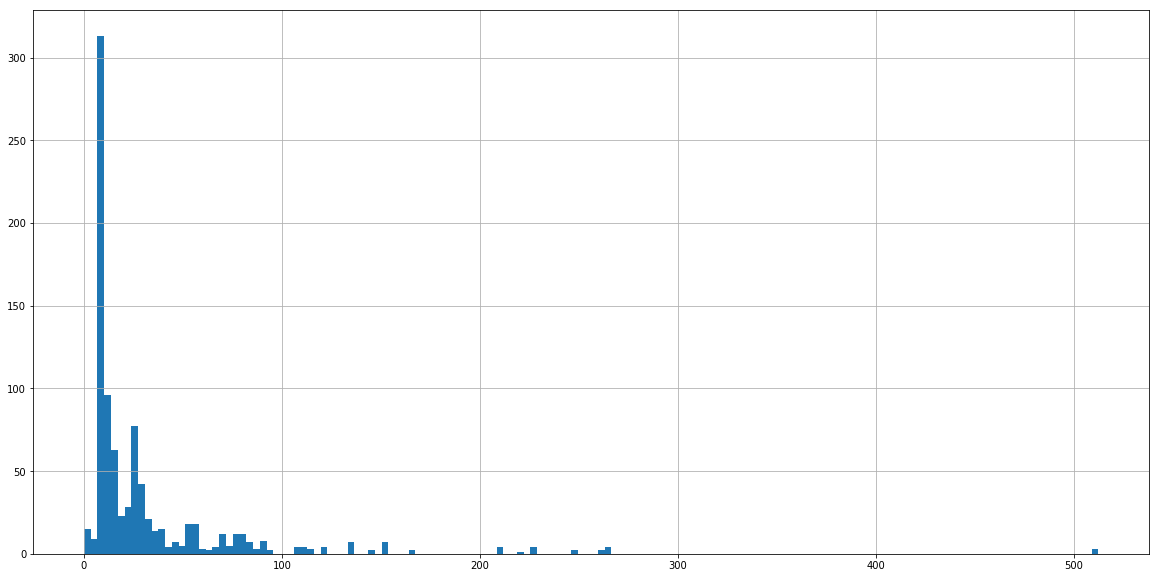

In [3]:
t_df["Fare"].hist(bins=150,figsize=(20,10))

In [4]:
t_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [5]:
free_fare = t_df[(t_df["Fare"] < 0.01)]
print(str(len(free_fare))+" freeloaders")
free_fare

15 freeloaders


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [6]:
t_df[(t_df["Fare"] < 0.01) & ( t_df["Survived"] )].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,272.0,1.0,3.0,25.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,272.0,1.0,3.0,25.0,0.0,0.0,0.0
25%,272.0,1.0,3.0,25.0,0.0,0.0,0.0
50%,272.0,1.0,3.0,25.0,0.0,0.0,0.0
75%,272.0,1.0,3.0,25.0,0.0,0.0,0.0
max,272.0,1.0,3.0,25.0,0.0,0.0,0.0


In [7]:
#Passengers that survived and didn't pay for a ticket
t_df[(t_df["Fare"] < 0.01) & ( t_df["Survived"] )]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1157e6c88>]], dtype=object)

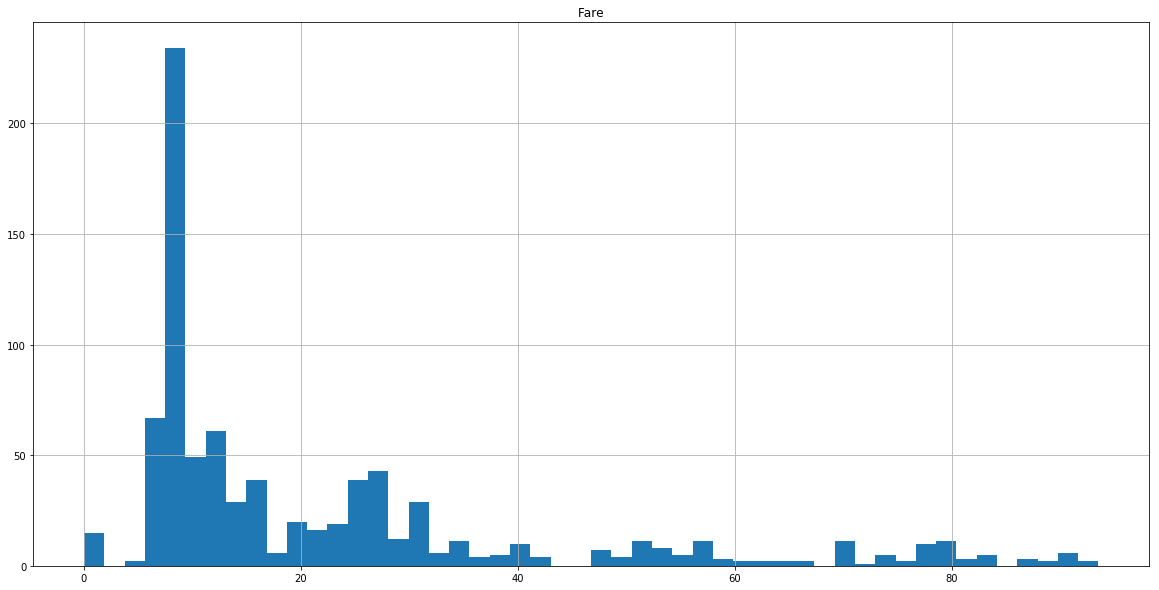

In [8]:
t_df[(t_df["Fare"]<100)].hist(column="Fare", bins=50,figsize=(20,10))

In [26]:
#passengers that paid more than 150
upper_crust = t_df[(t_df["Fare"] > 150)]

print(str(len(upper_crust)) + " people paid more than $150")

upper_crust.describe()

29 people paid more than 150


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,29.000000,29.000000,29.0,27.000000,29.000000,29.000000,29.000000
mean,472.862069,0.689655,1.0,30.478519,0.655172,1.103448,240.775579
std,230.677376,0.470824,0.0,14.873135,1.009804,1.012240,102.640802
min,28.000000,0.000000,1.0,0.920000,0.000000,0.000000,151.550000
25%,306.000000,0.000000,1.0,21.500000,0.000000,0.000000,164.866700
50%,439.000000,1.000000,1.0,29.000000,0.000000,1.000000,227.525000
75%,701.000000,1.000000,1.0,39.000000,1.000000,2.000000,262.375000
max,857.000000,1.000000,1.0,64.000000,3.000000,4.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115aa5278>]], dtype=object)

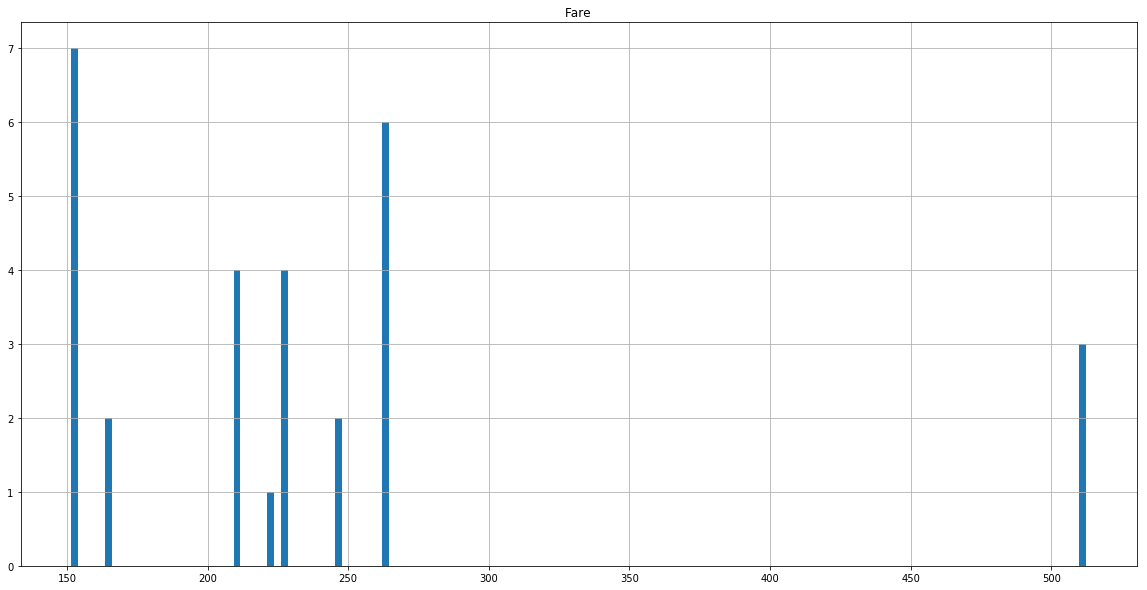

In [10]:
t_df[(t_df["Fare"] > 150)].hist(column="Fare", bins=150,figsize=(20,10))

In [11]:
#All Fares grouped by dollar
tot_gp = t_df["Fare"].round(0)
tot_ct = Counter(tot_gp)


In [12]:
#get Fares of those that survived grouped by dollar
survived_fare = t_df.loc[t_df.Survived == 1, "Fare"].round(0)
grp_fare = Counter(survived_fare)


<class 'tuple'>
surv_list is  <class 'list'>
<class 'zip'>


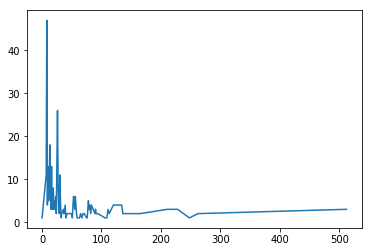

In [13]:
surv_list = sorted(dict(grp_fare).items())
x,y = zip(*surv_list)
print(type(x))
plt.plot(x, y)
print("surv_list is ", type(surv_list))
my = zip(*surv_list)
print(type(my))

<Container object of 90 artists>

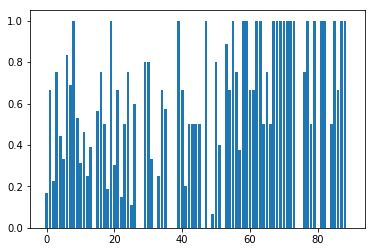

In [14]:
#Find Survival Rate based on ticket price
fare_mortality = dict()
survived = dict(grp_fare)

for key in dict(tot_ct):
    #fare_mortality[key] = surv_list[key] / value
    if key in survived:
        #print(survived[key]/tot_ct[key])
        fare_mortality[key] = survived[key]/tot_ct[key]
    else:
        #print(0)
        fare_mortality[key] = 0.0
#bar Chart
plt.bar(range(len(fare_mortality)), fare_mortality.values(), align="center")



Chance of survival based on ticket price


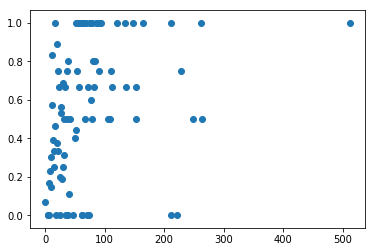

In [15]:
x = fare_mortality.keys()
y = fare_mortality.values()
plt.scatter(x,y)
print("Chance of survival based on ticket price")

In [16]:
#Get only males that survived
surviving_df = t_df.loc[t_df.Survived == 1, {"Fare", "Sex", "Survived", "Age"}].round(0)
surviving_male_df = surviving_df.loc[t_df.Sex == "male", {"Fare", "Sex", "Survived", "Age"}]
surviving_male_df.head()

,Sex,Survived,Fare,Age
17,male,1,13.0,NaN
21,male,1,13.0,34.0
23,male,1,36.0,28.0
36,male,1,7.0,NaN
55,male,1,36.0,NaN


In [17]:
surviving_male_df.describe()

,Survived,Fare,Age
count,109.0,109.000000,93.000000
mean,1.0,40.834862,27.279570
std,0.0,71.315355,16.499253
min,1.0,0.000000,0.000000
25%,1.0,10.000000,18.000000
50%,1.0,26.000000,28.000000
75%,1.0,39.000000,36.000000
max,1.0,512.000000,80.000000


In [18]:
tot_male_df = t_df.loc[t_df.Sex == "male", {"Fare", "Sex", "Survived", "Age"}]
tot_male_df.head()

,Sex,Survived,Fare,Age
0,male,0,7.2500,22.0
4,male,0,8.0500,35.0
5,male,0,8.4583,NaN
6,male,0,51.8625,54.0
7,male,0,21.0750,2.0


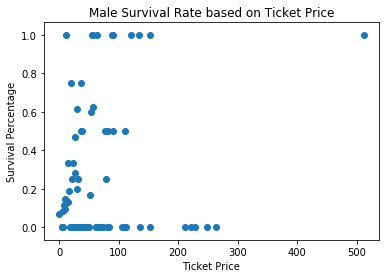

In [20]:
#Round to nearest dollar
total_male_fare = t_df.loc[t_df.Sex == "male", {"Fare", "Survived"}].round(0)
#survived_male_fare = Counter(total_male_fare[total_male_fare.Survived == "1", {"Fare", "Survived"}])
tot_ref_frame = dict(Counter(total_male_fare.loc[total_male_fare.Fare >= 0, "Fare"]))
survived_male_fare = Counter(total_male_fare.loc[ total_male_fare.Survived > 0, "Fare"])

x = []
y = []
for key in tot_ref_frame:
    if key in survived_male_fare:
        x.append(key)
        y.append(survived_male_fare[key]/tot_ref_frame[key])
    else:
        x.append(key)
        y.append(0)
        
plt.xlabel("Ticket Price")
plt.ylabel("Survival Percentage")
plt.title("Male Survival Rate based on Ticket Price")
plt.scatter(x,y)

In [22]:
def get_xy_points_survival_rate_and_price(sex, survival):
    fares_df = t_df.loc[t_df.Sex == sex, {"Fare", "Survived"}].round(0)
    
    tot_ref_frame = dict(Counter(fares_df.loc[fares_df.Fare >= 0, "Fare"]))
    
    if not survival:
        survived_male_fare = Counter(fares_df.loc[ fares_df.Survived > 0, "Fare"])
    


,Survived,Fare
0,0,7.0
4,0,8.0
5,0,8.0
6,0,52.0
7,0,21.0
12,0,8.0
13,0,31.0
16,0,29.0
17,1,13.0
20,0,26.0


In [ ]:
tot_male_df = t_df.loc[t_df.Sex == "male", {"Survived", "Age"}]
surviving_male_df = tot_male_df.loc[tot_male_df.Survived > 0, "Age"]
surviving_male_df 

surviving_male_df.hist(bins = 50,figsize=(20,10))
#plt.hist(surviving_male_df)

In [ ]:
#Male Survival Rate based on Age
male_ref = tot_male_df.loc[tot_male_df.Age >= 0, "Survived"]


In [ ]:
#given that a passenger survived what are the odds their age is under 18?
